# Google Stock

In this notebook you will find the use of a couple of python library. The dataset being use Google stock, which is in a comma separated file with 6 columns, with this dataset we will open the file, delete, add, create columns, and see the data in a graphical manner.
This project was develop after the finishing the online [zero to pandas](http://zerotopandas.com), which taught me python fundaments, some library such as NumPy and other use tools. 


In [ ]:
project_name = "ggStock"

!pip install jovian --upgrade -q

import jovian

jovian.commit(project=project_name)

## Data Preparation and Cleaning



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as t

In [9]:
from urllib.request import urlretrieve

urlretrieve('https://gist.githubusercontent.com/JEAV816/efa51fe9d81c0e2f466b1f3e69c617c4/raw/googl.us.txt', 
            'G.csv')

('G.csv', <http.client.HTTPMessage at 0x7f59f506ab20>)

In [10]:
google_df = pd.read_csv('G.csv')
google_df

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0
...,...,...,...,...,...,...,...
3328,2017-11-06,1049.100,1052.59,1042.000,1042.680,913954,0
3329,2017-11-07,1049.650,1053.41,1043.000,1052.390,1303832,0
3330,2017-11-08,1050.050,1062.69,1047.050,1058.290,1214469,0
3331,2017-11-09,1048.000,1050.88,1035.850,1047.720,1793994,0


#### Delete OpenInt from the dataframe and checking Date's type

In [11]:
google_df = google_df.drop('OpenInt', axis=1)
google_df['Date']

0       2004-08-19
1       2004-08-20
2       2004-08-23
3       2004-08-24
4       2004-08-25
           ...    
3328    2017-11-06
3329    2017-11-07
3330    2017-11-08
3331    2017-11-09
3332    2017-11-10
Name: Date, Length: 3333, dtype: object

#### Changing Date column from object to date

In [12]:
google_df['Date'] = pd.to_datetime(google_df.Date)

#### Taking parts of the date to make new columns

In [13]:
google_df['year'] = pd.DatetimeIndex(google_df.Date).year
google_df['month'] = pd.DatetimeIndex(google_df.Date).month
google_df['day'] = pd.DatetimeIndex(google_df.Date).day
google_df['weekday'] = pd.DatetimeIndex(google_df.Date).weekday
google_df[['year','month','day','weekday']]

,year,month,day,weekday
0,2004,8,19,3
1,2004,8,20,4
2,2004,8,23,0
3,2004,8,24,1
4,2004,8,25,2
...,...,...,...,...
3328,2017,11,6,0
3329,2017,11,7,1
3330,2017,11,8,2
3331,2017,11,9,3


In [14]:
google_df = google_df.round({'Open':2,'High':2,'Low': 2, 'Close': 2})

In [15]:
google_df.describe()

,Open,High,Low,Close,Volume,year,month,day,weekday
count,3333.000000,3333.000000,3333.000000,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000
mean,389.993360,393.377354,386.213261,389.855818,7.951734e+06,2010.742574,6.602760,15.734473,2.023702
std,235.104762,236.348210,233.616317,235.102372,8.327410e+06,3.834478,3.419283,8.760314,1.398971
min,49.600000,50.870000,47.980000,50.000000,0.000000e+00,2004.000000,1.000000,1.000000,0.000000
25%,228.730000,230.930000,226.170000,228.510000,2.535424e+06,2007.000000,4.000000,8.000000,1.000000
50%,295.980000,298.190000,293.350000,295.610000,5.201600e+06,2011.000000,7.000000,16.000000,2.000000
75%,550.370000,554.780000,545.500000,549.490000,1.047400e+07,2014.000000,10.000000,23.000000,3.000000
max,1050.050000,1063.620000,1047.050000,1058.290000,8.223340e+07,2017.000000,12.000000,31.000000,4.000000


In [16]:
google_df['Open'].mean().round(2)

389.99

In [17]:
google_df['High'].mean().round(2)

393.38

In [18]:
google_df['Low'].mean().round(2)

386.21

In [19]:
google_df['Close'].mean().round(2)

389.86

## Exploratory Analysis and Visualization



In [20]:
google_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'year', 'month',
       'day', 'weekday'],
      dtype='object')

In [21]:
type(google_df)

pandas.core.frame.DataFrame

In [22]:
google_df['Date']

0      2004-08-19
1      2004-08-20
2      2004-08-23
3      2004-08-24
4      2004-08-25
          ...    
3328   2017-11-06
3329   2017-11-07
3330   2017-11-08
3331   2017-11-09
3332   2017-11-10
Name: Date, Length: 3333, dtype: datetime64[ns]

In [23]:
vol = google_df['Volume'].sum()
vol

26503128932

On the  calculations below we can see that a couple new columns are being created, *containing the difference of open and close* and the a conclusion given by a condition checking the *Profit/Lost.* 

In [24]:
google_df['Profit/Lost'] = google_df['Open'] - google_df['Close']

google_df.loc[google_df['Profit/Lost'] > 0, 'Conclusion'] = 'Profit'
google_df.loc[google_df['Profit/Lost'] < 0, 'Conclusion'] = 'Lost'

google_df

,Date,Open,High,Low,Close,Volume,year,month,day,weekday,Profit/Lost,Conclusion
0,2004-08-19,50.00,52.03,47.98,50.17,44703800,2004,8,19,3,-0.17,Lost
1,2004-08-20,50.50,54.54,50.25,54.16,22857200,2004,8,20,4,-3.66,Lost
2,2004-08-23,55.38,56.74,54.52,54.70,18274400,2004,8,23,0,0.68,Profit
3,2004-08-24,55.62,55.80,51.78,52.44,15262600,2004,8,24,1,3.18,Profit
4,2004-08-25,52.48,54.00,51.94,53.00,9197800,2004,8,25,2,-0.52,Lost
...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2017-11-06,1049.10,1052.59,1042.00,1042.68,913954,2017,11,6,0,6.42,Profit
3329,2017-11-07,1049.65,1053.41,1043.00,1052.39,1303832,2017,11,7,1,-2.74,Lost
3330,2017-11-08,1050.05,1062.69,1047.05,1058.29,1214469,2017,11,8,2,-8.24,Lost
3331,2017-11-09,1048.00,1050.88,1035.85,1047.72,1793994,2017,11,9,3,0.28,Profit


On the following *open, high, low and close* are pretty much the same based on days, week and month, so i will display one of the them to show case the rest.

0.8749276865273714

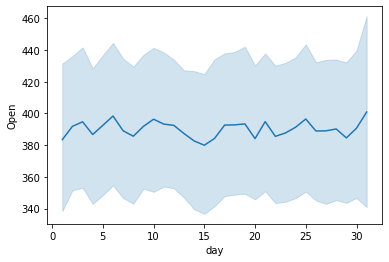

In [58]:
start = t() 
sns.lineplot(google_df.day, google_df.Open);
stop = t()
stop-start

0.2277667485177517

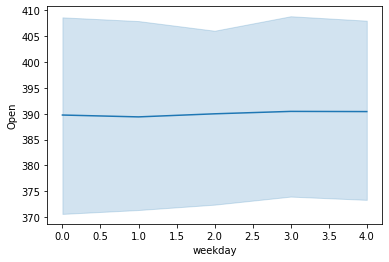

In [59]:
start = t() 
sns.lineplot(google_df.weekday, google_df.Open);
stop = t()
stop-start

0.39521506428718567

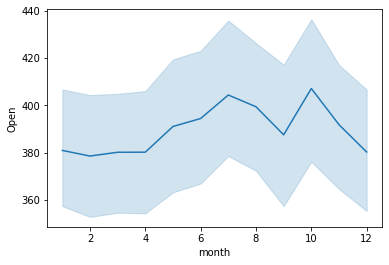

In [20]:
start = t() 
sns.lineplot(google_df.month, google_df.Open);
stop = t()
stop-start

0.44153740629553795

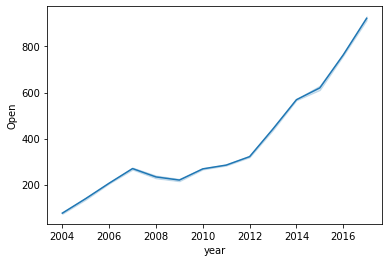

In [145]:
start = t() 
sns.lineplot(google_df.year, google_df.Open);
stop = t()
stop-start

If you wish to check just to check **modify the one below**

0.43920970521867275

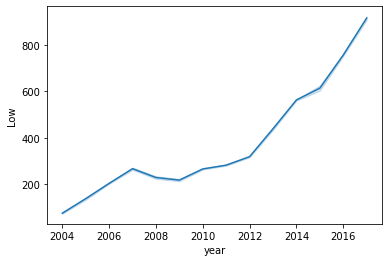

In [22]:
start = t() 
sns.lineplot(google_df.year, google_df.Low);
stop = t()
stop-start

On the graph below we can see the **daily, monthly and yearly** fluctuation

0.8114067129790783

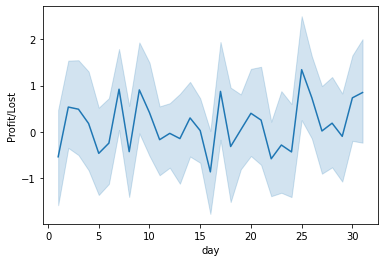

In [23]:
start = t() 
sns.lineplot(google_df.day, google_df['Profit/Lost']);
stop = t()
stop-start

0.3664676621556282

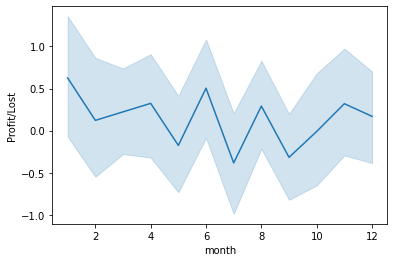

In [24]:
start = t() 
sns.lineplot(google_df.month, google_df['Profit/Lost']);
stop = t()
stop-start

0.45523105934262276

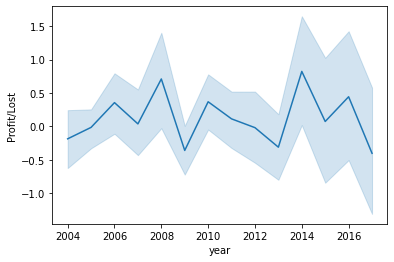

In [25]:
start = t() 
sns.lineplot(google_df.year, google_df['Profit/Lost']);
stop = t()
stop-start

## Asking and Answering Questions


- How has the volume change over time?
- What's the ratio profit or loss?
- In what days does the google's volume seems to be the highest?
- can we calculate the changes on google stocks?

1.0123122483491898

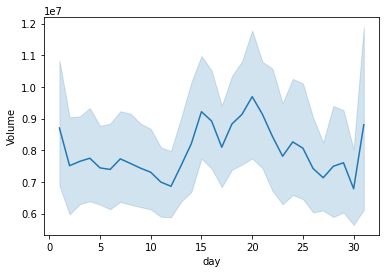

In [26]:
start = t() 
sns.lineplot(google_df.day, google_df.Volume);
stop = t()
stop-start

On the graph we can see the changes of the volume on a daily bases, in which according to the graph it *tends to rise towards the middle of the month* , now the graph below  show the variations of every month *(the lowest tends to be on August)*

0.49909645691514015

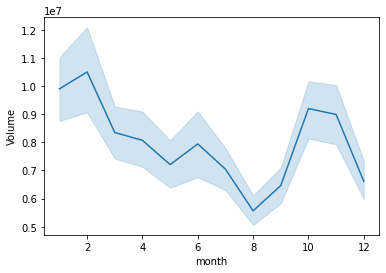

In [27]:
start = t() 
sns.lineplot(google_df.month, google_df.Volume);
stop = t()
stop-start

We can see that since 2004 google's volume has reduce drasticly

0.4938645288348198

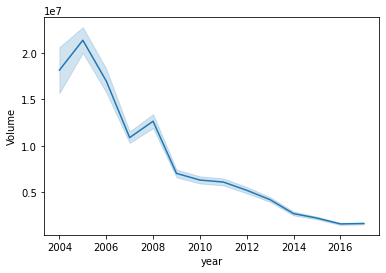

In [143]:
start = t() 
sns.lineplot(google_df.year, google_df.Volume);
stop = t()
stop-start

In [30]:
PL = google_df.Conclusion.value_counts()#PL : Profit/Low
PL

Profit    1699
Lost      1630
Name: Conclusion, dtype: int64

Based on the daily profit/loss from 2004 to 2016, google'stock has 51 percent on profit and the rest as lost

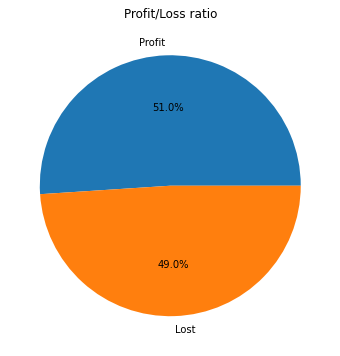

In [31]:
plt.figure(figsize=(12,6))
plt.title('Profit/Loss ratio')
plt.pie(PL, labels=PL.index, autopct='%1.1f%%');

The highest volume tends to occurs on fridays

([<matplotlib.axis.XTick at 0x7f59f4c0ba30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

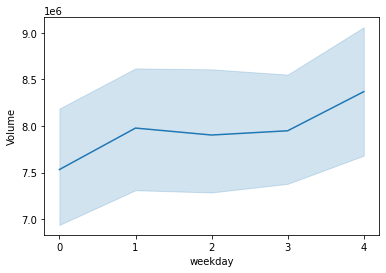

In [26]:
sns.lineplot(google_df.weekday, google_df.Volume);
plt.xticks([0, 1,2,3,4])

In here we are calculating the daily variation, change, on google stocks, for now the daily variation is redundant since it doest show enough information

In [36]:
closing_avg = google_df['Close'].mean()# to calculate the variance we need that average of the close column
#Then substract the average from every row and square it
#After we divide it by the number of row on the column
varience =(closing_avg - google_df['Close'])**2/google_df['Close'].count()

daily_varience = (np.sqrt(varience)).round(2)#squareroot the result and we have the daily changes

annual_varience = (np.sqrt(253) * daily_varience).round(2)

In [37]:
google_df['dailyVarience'] = daily_varience
google_df['annualVarience'] = annual_varience # still not correct beacuse the amount needs to be the avege of every year

google_df
#sns.lineplot(volatility_df.Date, volatility_df.Volatility)

,Date,Open,High,Low,Close,Volume,year,month,day,weekday,Profit/Lost,Conclusion,dailyVarience,annualVarience
0,2004-08-19,50.00,52.03,47.98,50.17,44703800,2004,8,19,3,-0.17,Lost,5.88,93.53
1,2004-08-20,50.50,54.54,50.25,54.16,22857200,2004,8,20,4,-3.66,Lost,5.81,92.41
2,2004-08-23,55.38,56.74,54.52,54.70,18274400,2004,8,23,0,0.68,Profit,5.81,92.41
3,2004-08-24,55.62,55.80,51.78,52.44,15262600,2004,8,24,1,3.18,Profit,5.84,92.89
4,2004-08-25,52.48,54.00,51.94,53.00,9197800,2004,8,25,2,-0.52,Lost,5.83,92.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2017-11-06,1049.10,1052.59,1042.00,1042.68,913954,2017,11,6,0,6.42,Profit,11.31,179.90
3329,2017-11-07,1049.65,1053.41,1043.00,1052.39,1303832,2017,11,7,1,-2.74,Lost,11.48,182.60
3330,2017-11-08,1050.05,1062.69,1047.05,1058.29,1214469,2017,11,8,2,-8.24,Lost,11.58,184.19
3331,2017-11-09,1048.00,1050.88,1035.85,1047.72,1793994,2017,11,9,3,0.28,Profit,11.40,181.33


What happens here is that the daily changes are small and the is not enough to concluse something

Auto generated graph with the data set

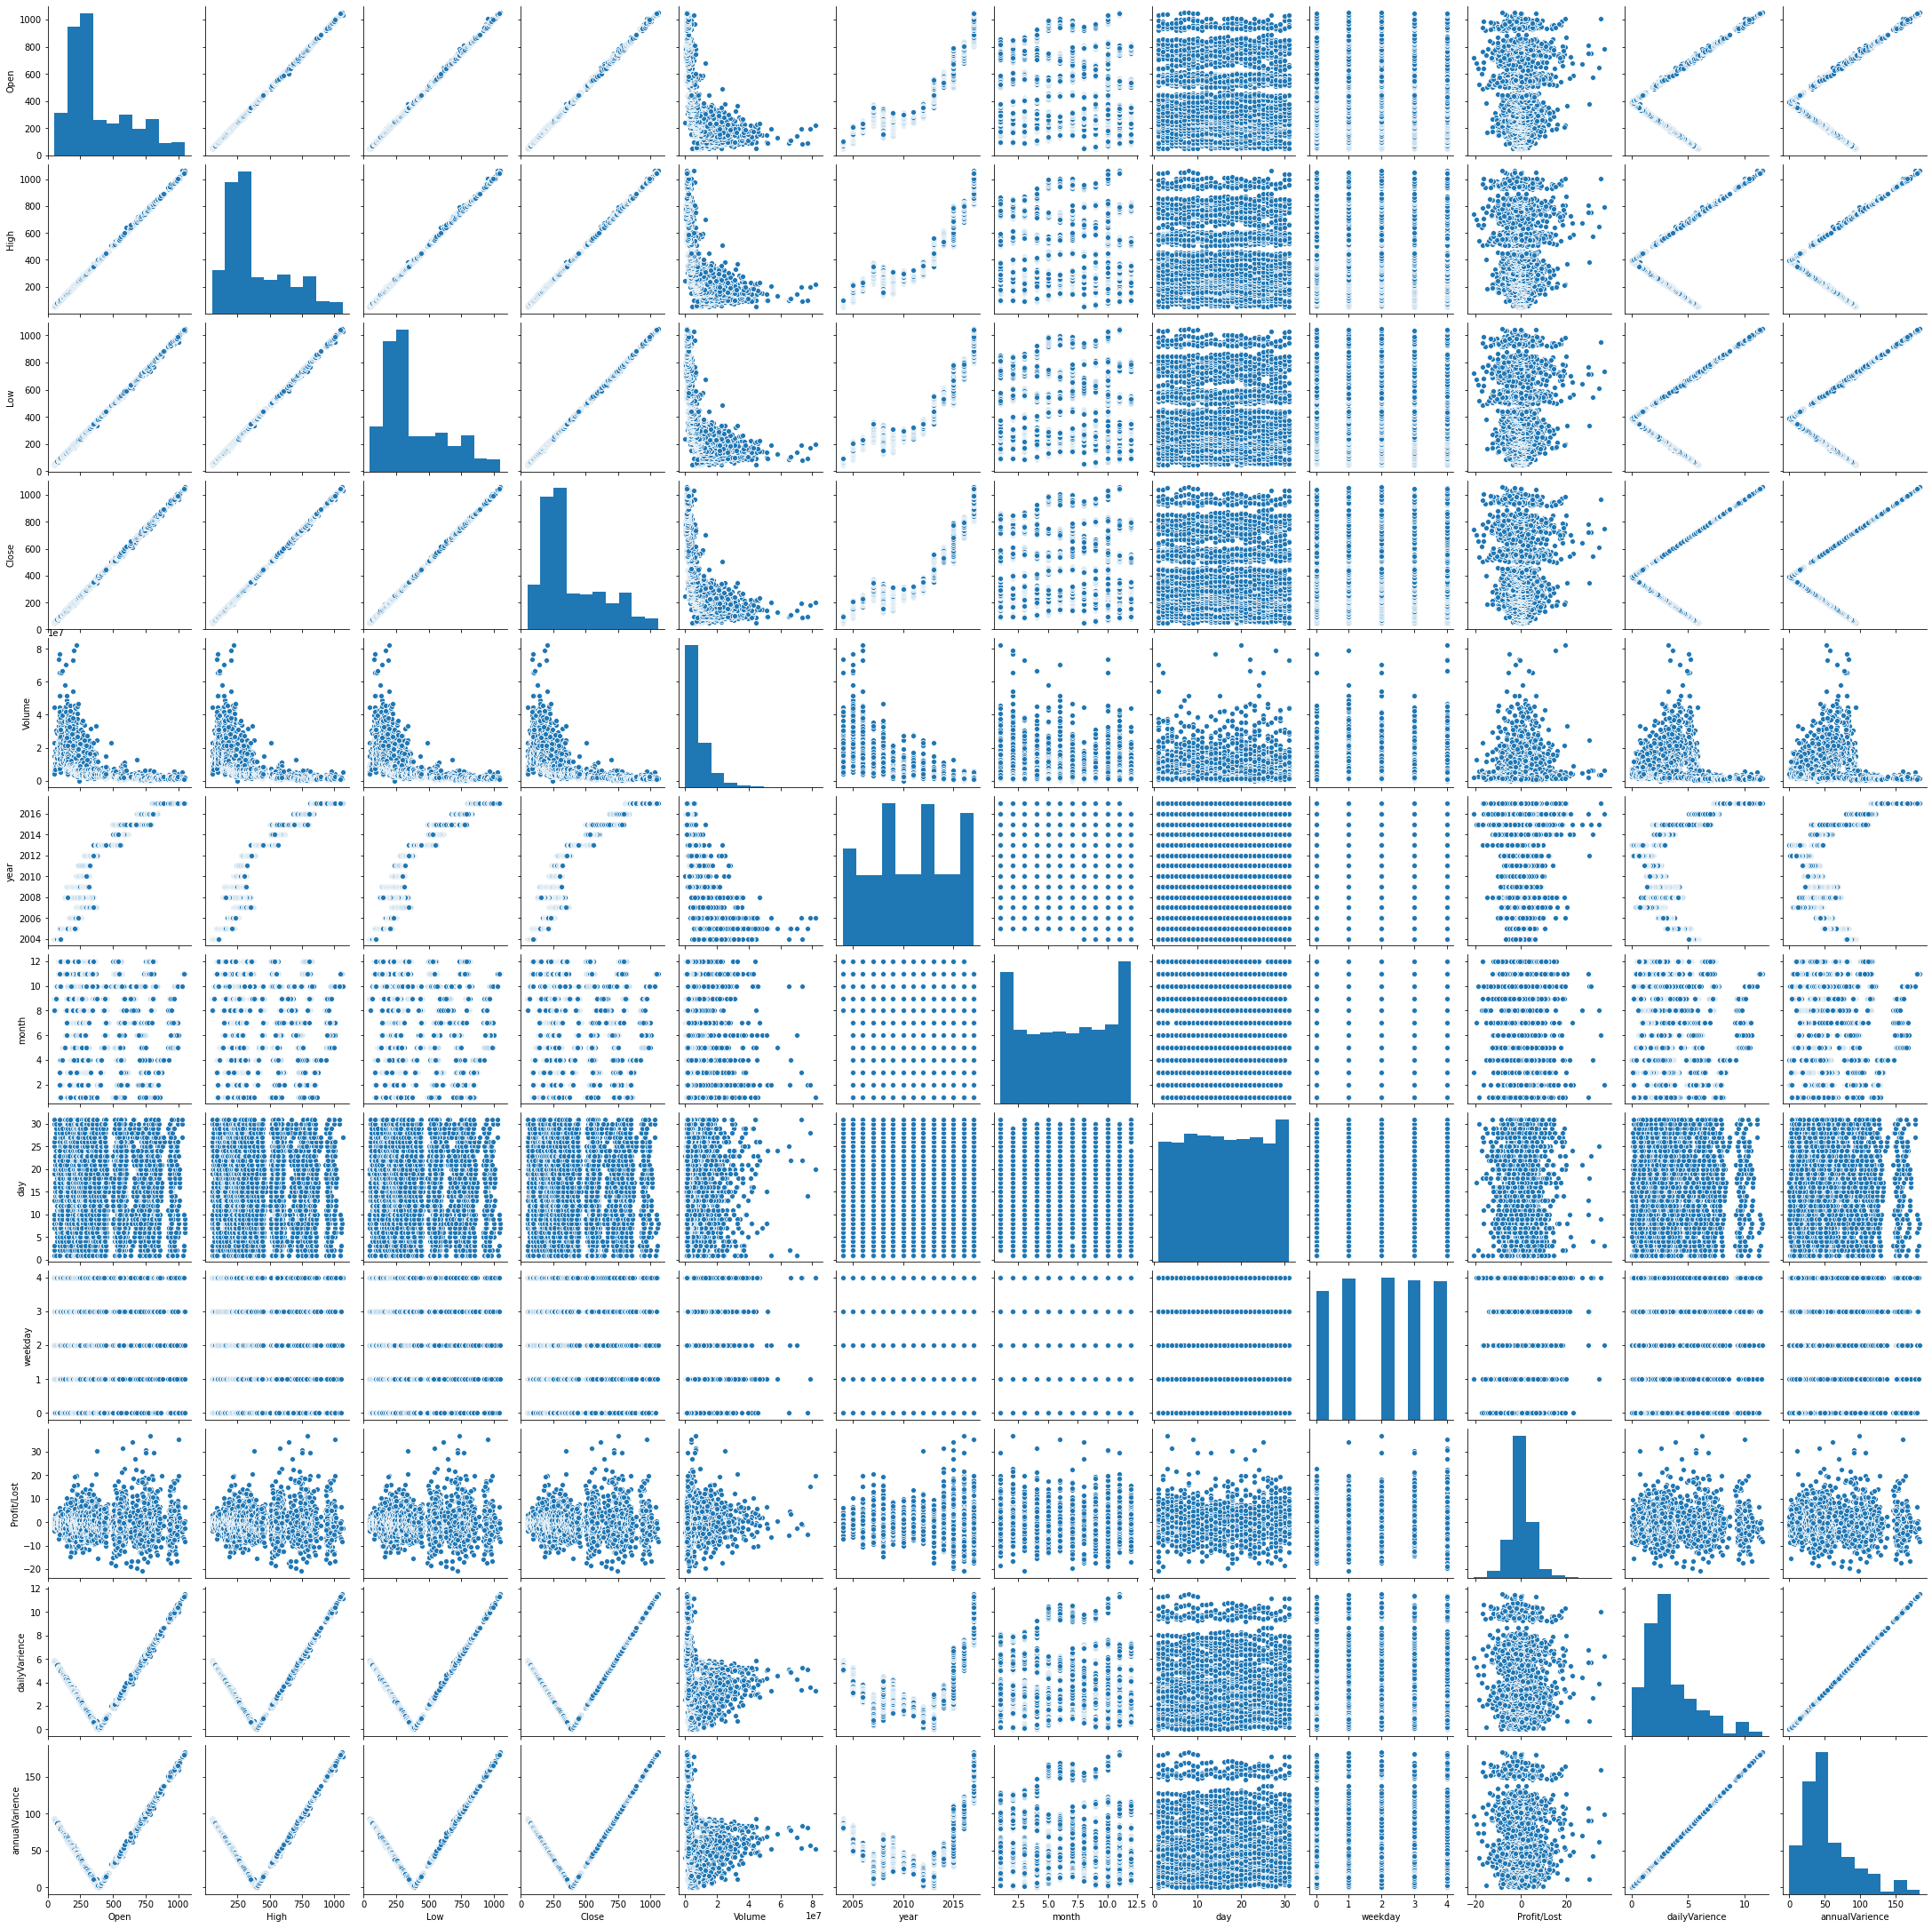

In [135]:
sns.pairplot(google_df)

These are the actual yearly changes of google stocks 

In [57]:
yearly_varience = (google_df['annualVarience'].groupby(google_df.year).mean()).round(2)
av = pd.DataFrame(yearly_varience) 
av

,annualVarience
year,
2004,86.49
2005,69.14
2006,50.76
2007,33.19
2008,43.37
2009,46.84
2010,33.63
2011,29.03
2012,18.86


<AxesSubplot:xlabel='year', ylabel='annualVarience'>

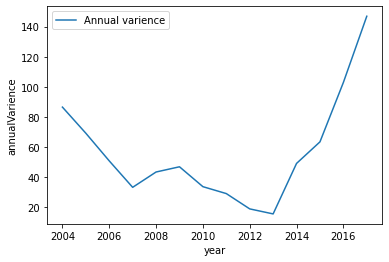

In [63]:
sns.lineplot(av.index, av.annualVarience, label='Annual varience')

## Inferences and Conclusion

When I started this project I realized that google stocks have been stable from 2004 to 2017 and that their monetary value has been growing gradually. I thank Jovian.ml for provide this online course I really appreciate all the work that you guy put on the lives and assignments, you guy are the most interactive online course I have taken, one more thank you and I hope to participate in more of you courses.

*Let the code force be with you!*

## References and Future Work

__[Dataset link](https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs)__

__[Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/)__

__[Numpy](https://numpy.org/devdocs/reference/)__

__[interesting dataset](https://www.kaggle.com/datasnaek/youtube-new)__
